##### Authors
- Daniel Jove Díaz
- Pablo Fuentes Chemes

# CUSTOM CONVOLUTIONAL NEURAL NETWORKS

In this practice, we will develop a custom convolutional neural network from scratch to tackle the classification problem posed by the CIFAR100 dataset. The CIFAR100 dataset consists of 60,000 32x32 color images in 100 different classes, with 600 images per class. The goal is to build a model that can accurately classify these images into their respective categories.

We will start by defining the architecture of our custom CNN, followed by training the model on the CIFAR100 dataset.Then, we will try to improve their performance by using regularization technieques. Finally, we will evaluate the performance of our model and analyze the results.


### LOAD THE DATASET


The CIFAR-100 dataset is loaded using TensorFlow's `tf.keras.datasets.cifar100.load_data()` function. The dataset is split into training and testing sets, with `x_train` and `y_train` representing the training images and labels, and `x_test` and `y_test` representing the testing images and labels. The `label_mode="coarse"` parameter indicates that the dataset should be loaded with coarse labels, which group the 100 classes into 20 superclasses.

The shapes of the training and testing data are printed to provide an overview of the dataset dimensions. This helps in understanding the number of samples and the structure of the data.

Finally, the number of unique labels in the training set is calculated and printed.


In [ ]:
import tensorflow as tf

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode="coarse")

# Print the shape of the data
print(f'Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}')
num_classes = len(set(y_train.flatten()))
print(f'Number of different labels: {num_classes}')

2025-03-03 22:52:13.680771: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-03 22:52:13.827310: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741038733.896016  218705 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741038733.915611  218705 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-03 22:52:14.048770: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)
Number of different labels: 20


### DATASET PREPROCESSING

The code performs preprocessing on the CIFAR-100 dataset.

1. **Convert labels to categorical format**:
    - `to_categorical` is a function from `tensorflow.keras.utils` that converts class vectors (integers) to binary class matrices.
    - `y_train` and `y_test` are the original labels in integer format.
    - `num_classes` is the total number of classes (20 in this case).
    - The result is `y_train_categorical` and `y_test_categorical`, which are one-hot encoded representations of the labels.

2. **Normalize the pixel values**:
    - The pixel values of the images are originally in the range [0, 255].
    - The code converts the pixel values to `float32` and then normalizes them to the range [0, 1] by dividing by 255.0.
    - This normalization helps in faster convergence during training.

3. **Print the shapes of the preprocessed data**:
    - This prints the shapes of the normalized training and testing data, as well as the shapes of the one-hot encoded labels.
    - It provides an overview of the data dimensions after preprocessing.


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


### Create a validation dataset

Split the train set in two subsets: train and validation. The 20% was chosen to have the same number of images in the validation and test sets.

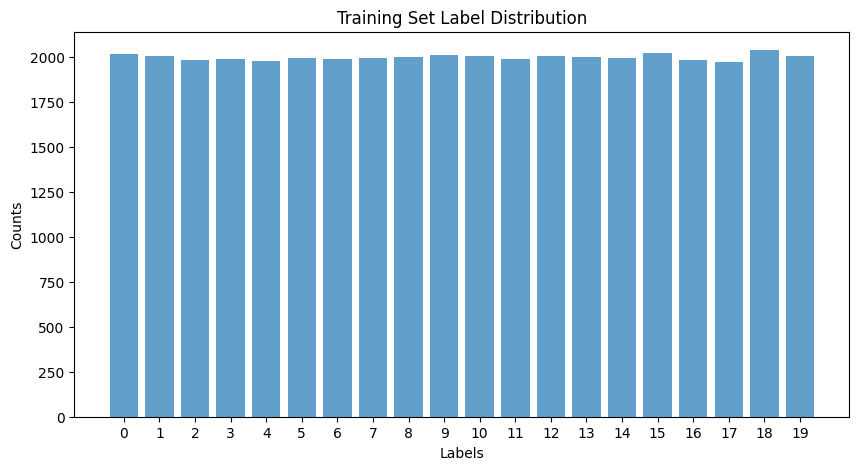

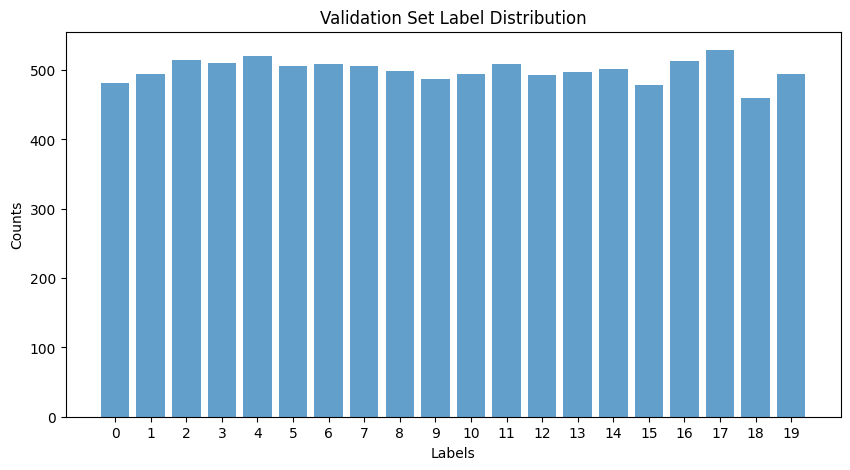

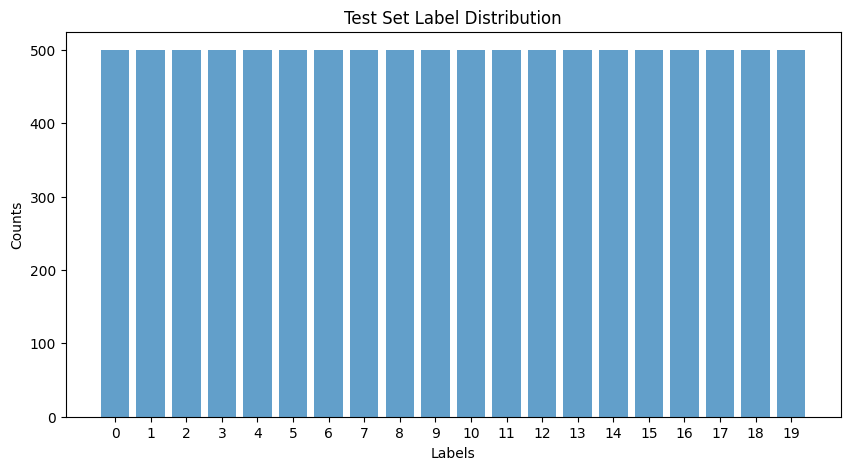

New training data shape: (40000, 32, 32, 3), New training labels shape: (40000, 1)
Validation data shape: (10000, 32, 32, 3), Validation labels shape: (10000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

import matplotlib.pyplot as plt

def plot_label_distribution(y, title):
    labels, counts = np.unique(y, return_counts=True)
    labels = labels.astype(int)  # Ensure labels are integers

    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, align='center', alpha=0.7)
    plt.xlabel('Labels')
    plt.ylabel('Counts')
    plt.title(title)
    plt.xticks(labels)  # Ensure x-axis shows integer labels
    plt.show()

# Plot label distribution for training, validation, and test sets
plot_label_distribution(y_train, 'Training Set Label Distribution')
plot_label_distribution(y_val, 'Validation Set Label Distribution')
plot_label_distribution(y_test, 'Test Set Label Distribution')
#
print(f'New training data shape: {x_train.shape}, New training labels shape: {y_train.shape}')
print(f'Validation data shape: {x_val.shape}, Validation labels shape: {y_val.shape}')
print(f'Test data shape: {x_val.shape}, Test labels shape: {y_val.shape}')


## Develop the custom neural network


###Model 1: Baseline Model

Fistly, a small CNN has been developed. The model is made up  of two convolutional layers, with a maxpooling layer between them. The features extracted by this layers are flattened in order to convert them into an entry of a dense layer with softmax output.

In [ ]:
import keras
from keras import layers


inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=3)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(20, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

I0000 00:00:1741038741.078850  218705 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4273 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 10, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │        20,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,892 (85.52 KB)

 Trainable params: 21,892 (85.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/simple_model.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    x_train, y_train,
    batch_size= 128,
    epochs=60,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    shuffle = True)

Epoch 1/60


I0000 00:00:1741038743.321623  219853 service.cc:148] XLA service 0x7e5d84005120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741038743.321648  219853 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-03-03 22:52:23.339498: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741038743.428635  219853 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-03 22:52:24.135142: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_382', 32 bytes spill stores, 32 bytes spill loads

2025-03-03 22:52:24.288041: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_382',

 54/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0753 - loss: 2.9461

I0000 00:00:1741038745.917492  219853 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.1460 - loss: 2.7590 - val_accuracy: 0.2732 - val_loss: 2.4002
Epoch 2/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2877 - loss: 2.3528 - val_accuracy: 0.3198 - val_loss: 2.2468
Epoch 3/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3225 - loss: 2.2185 - val_accuracy: 0.3409 - val_loss: 2.1650
Epoch 4/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3472 - loss: 2.1432 - val_accuracy: 0.3393 - val_loss: 2.1566
Epoch 5/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3655 - loss: 2.0854 - val_accuracy: 0.3627 - val_loss: 2.0795
Epoch 6/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3868 - loss: 2.0254 - val_accuracy: 0.3759 - val_loss: 2.0499
Epoch 7/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3961 - loss: 1.9815 - val_accuracy: 0.3826 - val_loss: 2.0286
Epoch 8/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4049 - loss: 1.9678 - val_accuracy: 0.3748 - val

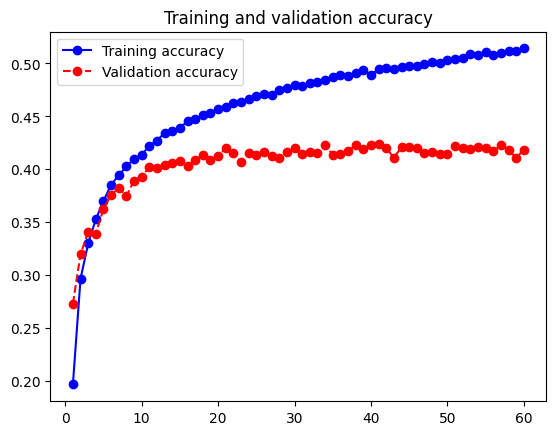

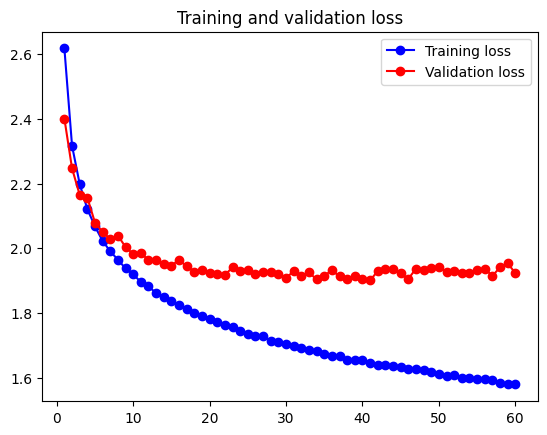

In [ ]:
from utils import plot
plot(history)

This small network is not capturing well the features of the images to classify them. This is reflected when observing the maximum value of validation accuracy (~ 42.43%) and the minimum value of val_loss (~ 1.90). So, a more complex architecture can be tried to attempt to get a model with more classification capabilities.

###Model 2: Increased Capacity Model
The second model, `model2`, has a more complex architecture compared to the first model. It consists of three convolutional layers with increasing filter sizes, followed by max-pooling layers, and a dense layer before the output layer. This increased complexity allows the model to capture more intricate features from the CIFAR-100 dataset.

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
outputs = layers.Dense(20, activation="softmax")(x)
model2 = keras.Model(inputs=inputs, outputs=outputs)

model2.summary()
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,100 (1.37 MB)

 Trainable params: 358,100 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model2.fit(
    x_train, y_train,
    batch_size= 128,
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    shuffle = True)

Epoch 1/50


2025-03-03 22:53:29.839602: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_494', 32 bytes spill stores, 32 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.1802 - loss: 2.6421 - val_accuracy: 0.3341 - val_loss: 2.1635
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3452 - loss: 2.1208 - val_accuracy: 0.3898 - val_loss: 1.9984
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4099 - loss: 1.9119 - val_accuracy: 0.4245 - val_loss: 1.8591
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4539 - loss: 1.7563 - val_accuracy: 0.4414 - val_loss: 1.7891
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4877 - loss: 1.6305 - val_accuracy: 0.4731 - val_loss: 1.7168
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5226 - loss: 1.5268 - val_accuracy: 0.4827 - val_loss: 1.6752
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5481 - loss: 1.4369 - val_accuracy: 0.4865 - val_loss: 1.6683
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5693 - loss: 1.3555 - val_accuracy: 0.4816 - va

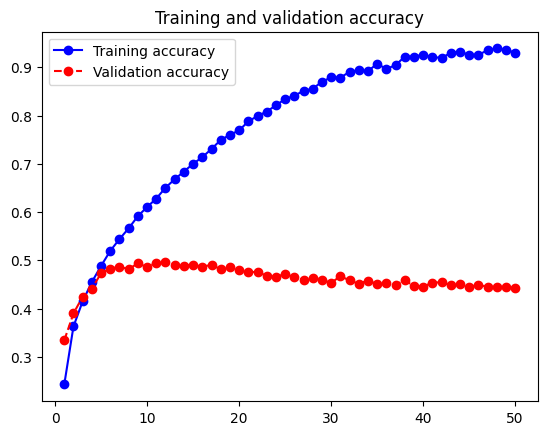

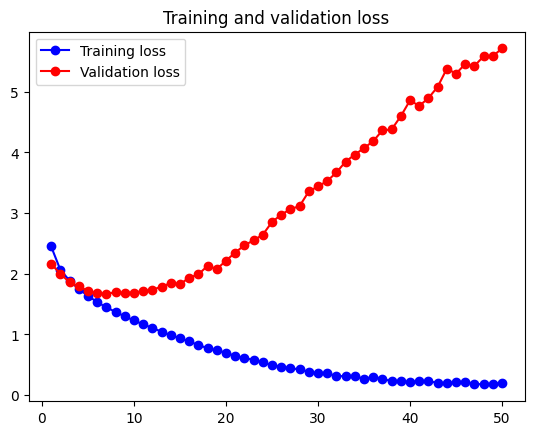

In [ ]:
plot(history)




Increasing the number of filters and the network’s depth improves the model’s ability to extract features. This model achieved a higher best val_accuracy (~ 49.56%) and a lower val_loss (~ 1.66) compared to `model1`, indicating that increased capacity helps generalization. However, overfitting occurs in this model, making the need for techniques to prevent it even more evident.

To avoid overfitting, we can introduce normalization layers and dropout layers in the model architecture. Here are some ideas:

- **Batch Normalization**: This normalizes the output of the previous activation layer by subtracting the batch mean and dividing by the batch standard deviation.
- **Dropout**: This randomly sets a fraction of input units to 0 at each update during training time, which helps prevent overfitting.



###Model 3: Batch Normalization
In `model3`, building on `model2`’s architecture, batch normalization is introduced after each convolutional layer to stabilize and accelerate training. Furthermore, the dense layer with 128 units now employs a ReLU activation to enhance non-linearity. On the training side, early stopping is added to the callbacks to halt training after several epochs without improvement in validation loss, which helps prevent overfitting.

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)

x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(20, activation="softmax")(x)

model_batch = keras.Model(inputs=inputs, outputs=outputs)

model_batch.summary()
model_batch.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,996 (1.37 MB)

 Trainable params: 358,548 (1.37 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/model_batch.keras",
        save_best_only=True,
        monitor="val_loss"),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=20,
        restore_best_weights=True)
]

history = model_batch.fit(
    x_train, y_train,
    batch_size= 128,
    epochs=200,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    shuffle = True)

Epoch 1/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.2556 - loss: 2.5654 - val_accuracy: 0.1606 - val_loss: 3.3345
Epoch 2/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4471 - loss: 1.8012 - val_accuracy: 0.3873 - val_loss: 2.0227
Epoch 3/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5378 - loss: 1.4681 - val_accuracy: 0.3579 - val_loss: 2.3653
Epoch 4/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6168 - loss: 1.2258 - val_accuracy: 0.4268 - val_loss: 2.0318
Epoch 5/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6806 - loss: 1.0149 - val_accuracy: 0.4704 - val_loss: 1.8478
Epoch 6/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7453 - loss: 0.8172 - val_accuracy: 0.4624 - val_loss: 2.0467
Epoch 7/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8025 - loss: 0.6377 - val_accuracy: 0.4410 - val_loss: 2.3508
Epoch 8/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8508 - loss: 0.4852 - val_ac

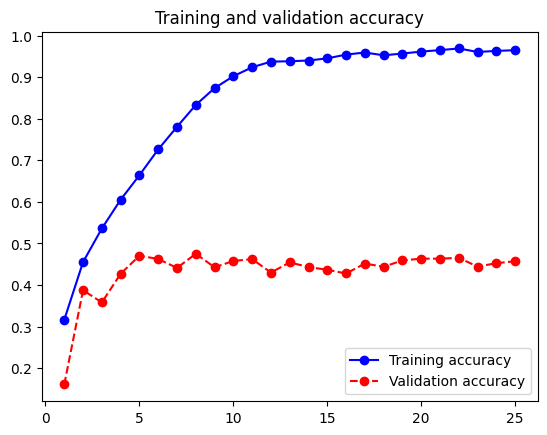

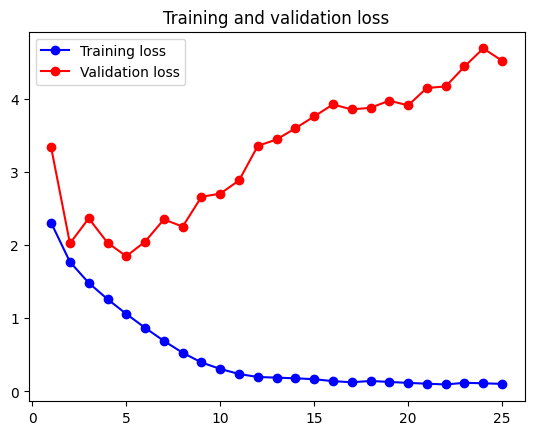

In [ ]:
plot(history)

Introducing Batch Normalization stabilizes the learning process and helps mitigate internal covariate shift. Interestingly, `model3`’s best val_accuracy (~ 47.5%) is slightly lower than `model2`’s. The higher val_loss (~ 1.85) suggests that further improvements (such as augmentation or additional regularization) may be necessary.

###Model 4: Model with Data Augmentation
`model4` extends the architecture by adding a data augmentation stage at the input. This augmentation layer applies random transformations, such as horizontal flips, rotations, and zooms, to increase the diversity of the training samples. As a result, the model is exposed to a wider range of variations, which improves its ability to generalize. Additionally, the training duration is extended to 200 epochs to allow the model to fully benefit from the augmented dataset while maintaining the overall architecture of `model3`.

In [ ]:
from keras.api.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
])

inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)

x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(20, activation="softmax")(x)

model_augmented = keras.Model(inputs=inputs, outputs=outputs)

model_augmented.summary()
model_augmented.compile(loss="sparse_categorical_crossentropy",
                        optimizer=keras.optimizers.Adam(learning_rate=0.001),
                        metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/model_batch_augmentation.keras",
        save_best_only=True,
        monitor="val_accuracy"),
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=20,
        restore_best_weights=True)
]

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,996 (1.37 MB)

 Trainable params: 358,548 (1.37 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history = model_augmented.fit(
    x_train, y_train,
    batch_size= 128,
    epochs=200,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    shuffle = True)

Epoch 1/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.2143 - loss: 2.7258 - val_accuracy: 0.1367 - val_loss: 3.0611
Epoch 2/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3167 - loss: 2.2290 - val_accuracy: 0.3562 - val_loss: 2.1074
Epoch 3/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3639 - loss: 2.0722 - val_accuracy: 0.3845 - val_loss: 2.0197
Epoch 4/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3838 - loss: 1.9886 - val_accuracy: 0.3226 - val_loss: 2.3254
Epoch 5/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4044 - loss: 1.9177 - val_accuracy: 0.3948 - val_loss: 1.9779
Epoch 6/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4245 - loss: 1.8607 - val_accuracy: 0.3789 - val_loss: 2.1273
Epoch 7/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4380 - loss: 1.8011 - val_accuracy: 0.4423 - val_loss: 1.7894
Epoch 8/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4497 - loss: 1.7618 - val_

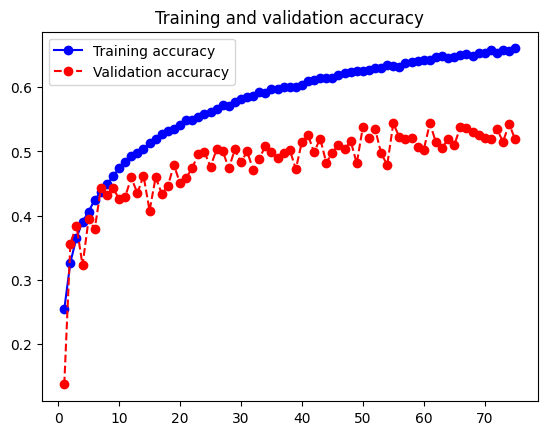

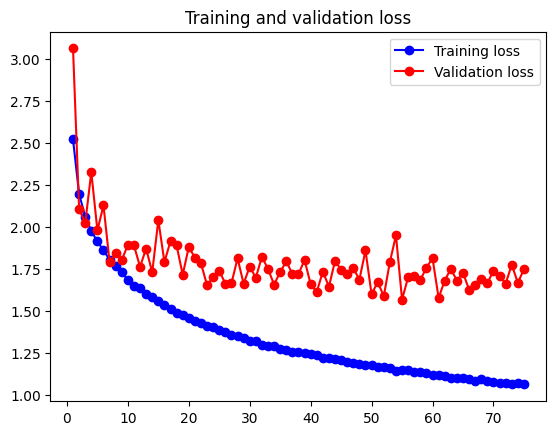

In [ ]:
plot(history)

Incorporating data augmentation diversifies the training data and improves generalization. The addition of augmentation boosts the best val_accuracy to ~54.40% and lowers the val_loss to ~1.57 compared to `model2` and `model3`, demonstrating its positive impact.

###Model 5: Model with Dropout Regularization
In `model5`, dropout layers are integrated into the network to further reduce overfitting. Dropout is applied after each convolutional block and also after the dense layer, which forces the model to learn more robust and redundant feature representations. This regularization strategy complements the data augmentation introduced in `model4`.

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(20, activation="softmax")(x)

model_dropout = keras.Model(inputs=inputs, outputs=outputs)

model_dropout.summary()
model_dropout.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.Adam(learning_rate=0.001),
                      metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/model_dropout.keras",
        save_best_only=True,
        monitor="val_accuracy"),
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=20,
        restore_best_weights=True)
]

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,996 (1.37 MB)

 Trainable params: 358,548 (1.37 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history = model_dropout.fit(
    x_train, y_train,
    batch_size= 128,
    epochs=200,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    shuffle = True)

Epoch 1/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.1937 - loss: 2.9144 - val_accuracy: 0.1312 - val_loss: 3.1713
Epoch 2/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3365 - loss: 2.1750 - val_accuracy: 0.2998 - val_loss: 2.3457
Epoch 3/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3933 - loss: 1.9582 - val_accuracy: 0.4304 - val_loss: 1.8649
Epoch 4/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4362 - loss: 1.8099 - val_accuracy: 0.4453 - val_loss: 1.7934
Epoch 5/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4721 - loss: 1.6998 - val_accuracy: 0.4489 - val_loss: 1.8036
Epoch 6/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4882 - loss: 1.6170 - val_accuracy: 0.4016 - val_loss: 2.0252
Epoch 7/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5103 - loss: 1.5397 - val_accuracy: 0.4822 - val_loss: 1.7102
Epoch 8/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5269 - loss: 1.4743 - val_ac

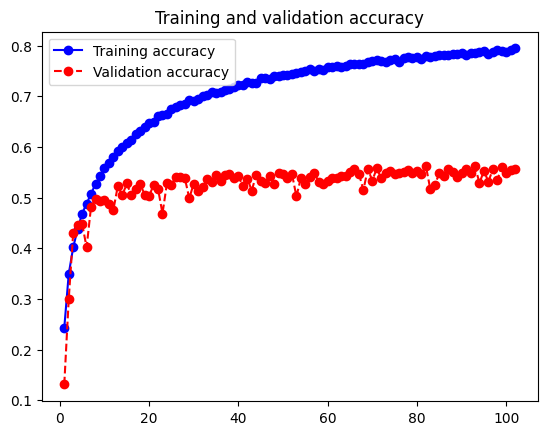

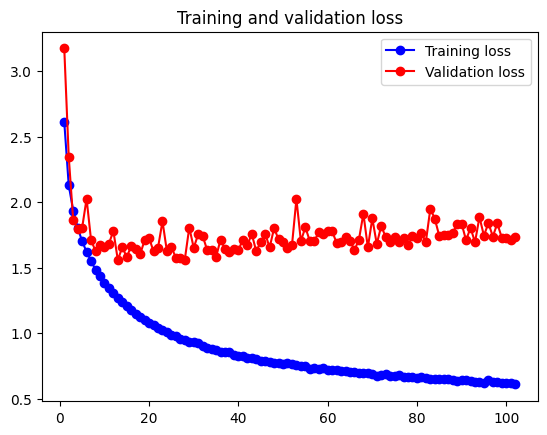

In [ ]:
plot(history)

By adding dropout to the augmented architecture from `model4`, the network becomes more robust against overfitting. `model5` shows further improvement in best val_accuracy (~ 56.3%) and a slight reduction in val_loss (~ 1.56) compared to `model4`, indicating that dropout offers additional regularization benefits.

###Model 6: Increased Capacity
In `model6`, the architecture is modified to further increase its capacity. The number of filters is raised to 64, 128, and 256 in the successive convolutional layers, and the dense layer is expanded to 256 units. The model continues to utilize both data augmentation and dropout, aiming to capture finer image details while keeping overfitting under control.

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(20, activation="softmax")(x)

model_dropout_augmented = keras.Model(inputs=inputs, outputs=outputs)

model_dropout_augmented.summary()
model_dropout_augmented.compile(loss="sparse_categorical_crossentropy",
                                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                                metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/model_dropout_augmented.keras",
        save_best_only=True,
        monitor="val_accuracy"),
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=20,
        restore_best_weights=True)
]

history = model_dropout_augmented.fit(
    x_train, y_train,
    batch_size=128,
    epochs=200,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    shuffle=True
)

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 20)             │         5,140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,426,580 (5.44 MB)

 Trainable params: 1,425,684 (5.44 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/200


E0000 00:00:1741039379.126471  218705 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_6_1/dropout_4_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.1696 - loss: 3.2445 - val_accuracy: 0.0953 - val_loss: 3.0993
Epoch 2/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.2823 - loss: 2.3523 - val_accuracy: 0.2788 - val_loss: 2.4088
Epoch 3/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3144 - loss: 2.2170 - val_accuracy: 0.3256 - val_loss: 2.1788
Epoch 4/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3479 - loss: 2.1145 - val_accuracy: 0.3741 - val_loss: 2.0450
Epoch 5/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3648 - loss: 2.0489 - val_accuracy: 0.3863 - val_loss: 2.0158
Epoch 6/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3875 - loss: 1.9755 - val_accuracy: 0.4084 - val_loss: 1.9421
Epoch 7/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3961 - loss: 1.9437 - val_accuracy: 0.3845 - val_loss: 2.0905
Epoch 8/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4118 - loss: 1.8815 - val_accuracy

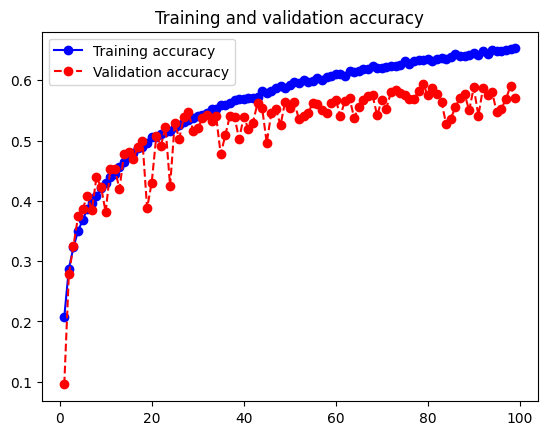

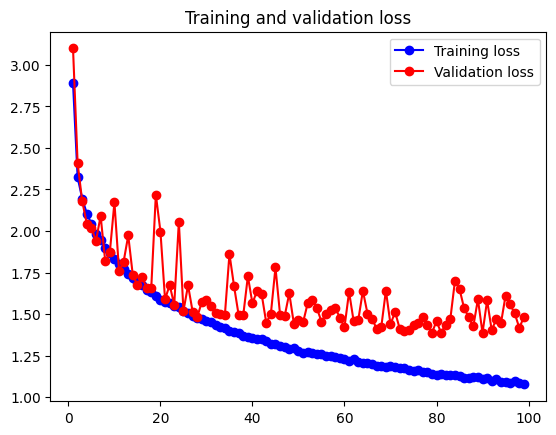

In [ ]:
plot(history)

By increasing the model’s capacity further while keeping data augmentation and dropout, `model6` achieves a best val_accuracy of ~59.4% and the lowest val_loss of ~1.39. This suggests that the network benefits from the increased number of filters and larger dense layer, provided that sufficient regularization is in place.

###Model 7: Residual Network Model
In `model7`, the network is transformed into a residual architecture by incorporating residual blocks with skip connections. An initial convolutional layer is followed by residual blocks that allow the gradient to flow more directly through the network, enabling the training of a much deeper model. This design is combined with data augmentation and dropout, resulting in a robust model that effectively captures complex, high-level features.

In [ ]:
from keras.layers import Add

def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same', activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = Add()([x, shortcut])
    return x

# Model definition with residual blocks
inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
x = layers.Conv2D(filters=256, kernel_size=3, activation=None)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = residual_block(x, filters=256)
x = layers.MaxPooling2D(pool_size=2)(x)

x = residual_block(x, filters=256)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.2)(x)

x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(20, activation="softmax")(x)

model_residual = keras.Model(inputs=inputs, outputs=outputs)

model_residual.summary()
model_residual.compile(loss="sparse_categorical_crossentropy",
                       optimizer=keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["accuracy"])

# Updated callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/model_residual.keras",
        save_best_only=True,
        monitor="val_accuracy"),
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=20,
        restore_best_weights=True),
]

# Train the model with residual blocks
history = model_residual.fit(
    x_train, y_train,
    batch_size=128,
    epochs=200,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    shuffle=True
)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 32, 32, 3) │          0 │ input_layer_7[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 30, 30,    │      7,168 │ sequential[2][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 30,    │      1,024 │ conv2d_17[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 30, 30,    │          0 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 15, 15,    │          0 │ re_lu[0][0]       │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 15, 15,    │    590,080 │ max_pooling2d_11… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │      1,024 │ conv2d_18[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 15, 15,    │          0 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 15, 15,    │    590,080 │ re_lu_1[0][0]     │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │      1,024 │ conv2d_19[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 15, 15,    │          0 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 15, 15,    │          0 │ re_lu_2[0][0],    │
│                     │ 256)              │            │ max_pooling2d_11… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 7, 7, 256) │          0 │ add[0][0]         │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 7, 7, 256) │    590,080 │ max_pooling2d_12… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 256) │      1,024 │ conv2d_20[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 7, 7, 256) │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 2,967,828 (11.32 MB)

 Trainable params: 2,965,268 (11.31 MB)

 Non-trainable params: 2,560 (10.00 KB)

Epoch 1/200


E0000 00:00:1741039966.845707  218705 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_7_1/dropout_8_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 72ms/step - accuracy: 0.1061 - loss: 3.7555 - val_accuracy: 0.0636 - val_loss: 3.0760
Epoch 2/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.1800 - loss: 2.6268 - val_accuracy: 0.1983 - val_loss: 2.6208
Epoch 3/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.2105 - loss: 2.5121 - val_accuracy: 0.1961 - val_loss: 2.5292
Epoch 4/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.2357 - loss: 2.4501 - val_accuracy: 0.2632 - val_loss: 2.3687
Epoch 5/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.2496 - loss: 2.3928 - val_accuracy: 0.2564 - val_loss: 2.4238
Epoch 6/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.2651 - loss: 2.3418 - val_accuracy: 0.2514 - val_loss: 2.4582
Epoch 7/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.2765 - loss: 2.3038 - val_accuracy: 0.2813 - val_loss: 2.3397
Epoch 8/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.2952 - loss: 2.2485 - val_

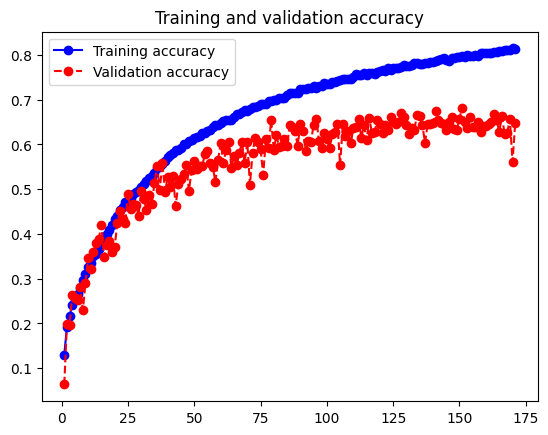

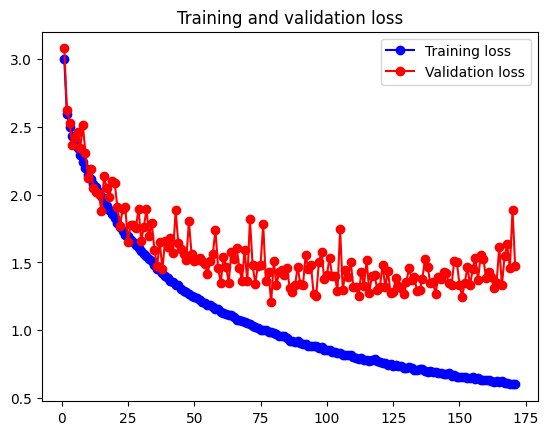

In [ ]:
plot(history)

The incorporation of residual blocks allows for training a much deeper network by alleviating the vanishing gradient problem. `model7` achieves the highest best val_accuracy (~ 68.2%) and the lowest val_loss (~ 1.25) among all models. This indicates that the residual network is most effective at capturing complex features in the dataset while maintaining stable and improved generalization.

##Discussion of the models


Throughout our experiments, we progressively refined our CNN architecture for classifying CIFAR-100 superclasses. Here is a summary of the different techniques and results obtained:

| Model                                                       | Key Techniques                                       | Best Val Accuracy | Lowest Val Loss |
|-------------------------------------------------------------|------------------------------------------------------|-------------------|-----------------|
| **Model 1: Baseline**                                       | Simple Conv2D, MaxPooling, Dense                     | ~42.4%           | ~1.90           |
| **Model 2: Increased Capacity**                             | More filters; deeper network                         | ~49.6%           | ~1.66           |
| **Model 3: Batch Normalization**                            | Model 2 + Batch Normalization                        | ~47.5%            | ~1.85           |
| **Model 4: Data Augmentation**                              | Model 3 + Data Augmentation                          | ~54.4%           | ~1.57           |
| **Model 5: Dropout Regularization**                         | Model 4 + Dropout                                    | ~56.3%            | ~1.56           |
| **Model 6: Increased Capacity**    | Model 5 + Increased filters        | ~59.4%            | ~1.39           |
| **Model 7: Residual Network**                               | Residual blocks, deep network, augmentation, dropout | ~68.2%            | ~1.25           |

We believed that simple increases in model capacity alone were not enough to achieve robust generalization. The baseline model provided a useful starting point, but its limited structure led to modest performance. In `model2`, we increased the number of filters and added a denser layer, which enabled the network to capture more complex features; however, this improvement was accompanied by increased instability and signs of overfitting.

When we incorporated batch normalization in `model3`, we observed a 2% reduction in validation accuracy compared to Model 2. This does not necessarily mean that `model3` is inferior; batch normalization changes the distribution of activations and may require adjustments to other hyperparameters. Moreover, because it uses mini-batch statistics to normalize the activations, a relatively small batch size can introduce noise and lead to less stable updates during training. For this reason, in `model4` we retained the previous architecture while adding data augmentation, knowing that batch normalization was not a drawback but a tool to be leveraged effectively.

In `model4`, data augmentation was introduced to diversify the training data through random transformations such as flips, rotations, and zooms. This technique improved the validation accuracy by about 7%, although our performance was still below our target. To further mitigate overfitting, we incorporated dropout in `model5`, anticipating that it would work synergistically with data augmentation. Since the improvement was marginal, we then increased the number of filters in `model6` to enhance the model’s ability to detect more complex patterns. Although this adjustment yielded some gains, they were not as significant as expected.

Finally, we took it a step further with `model7` by integrating all previous enhancements into a more complex architecture using a residual network. This model achieved our best performance with a validation accuracy of 68.2%, surpassing the previous model by 9%, which left us very satisfied. It is important to note that each model has its own advantages and disadvantages, as summarized in the next schema.


**Advantages & Disadvantages:**

- **Baseline (Model 1):**
  - *Advantages:* Simplicity and low computational cost.
  - *Disadvantages:* Limited feature extraction and low accuracy.

- **Increased Capacity (Model 2):**
  - *Advantages:* Improved ability to extract complex features.
  - *Disadvantages:* Without adequate regularization, the gains are modest and may lead to instability.

- **Batch Normalization (Model 3):**
  - *Advantages:* Stabilizes training and aids in faster convergence.
  - *Disadvantages:* Adds a slight computational overhead; in this case, it did not boost accuracy as much as expected.

- **Data Augmentation (Model 4):**
  - *Advantages:* Enhances generalization by diversifying the training data.
  - *Disadvantages:* May initially slow down convergence due to increased variability.

- **Dropout (Model 5):**
  - *Advantages:* Reduces overfitting by preventing neurons from co-adapting excessively.
  - *Disadvantages:* Requires careful tuning to avoid underfitting.

- **Increased Capacity (Model 6):**
  - *Advantages:* Further improves generalization through a richer and more capable architecture.
  - *Disadvantages:* The complexity increases, and the performance gains are incremental.

- **Residual Network (Model 7):**
  - *Advantages:* Enables the training of a much deeper network by mitigating vanishing gradient issues, leading to the best overall performance.
  - *Disadvantages:* Increased complexity and higher computational demand.
